In [22]:
w = 4*x^2 + 5*x^3
show(w)

5*x^3 + 4*x^2

In [27]:
var('c')
show(integrate(w,x) + c)

5/4*x^4 + 4/3*x^3 + c

In [28]:
var('EI, L, p, d1, d2, d3, d4')
junk1 = integrate(p/EI, x)+d1
junk2 = integrate(junk1, x)+d2
junk3 = integrate(junk2, x)+d3
junk4 = integrate(junk3, x)+d4
# need to include the constants of integration
show(junk4)

1/6*d1*x^3 + 1/24*p*x^4/EI + 1/2*d2*x^2 + d3*x + d4

In [29]:
eq1lhs = junk4.subs(x=0)
eq2lhs = diff(junk4, x).subs(x=0)
eq3lhs = junk4.subs(x=L)
eq4lhs = diff(junk4, x).subs(x=L)

In [30]:
sol=solve([eq1lhs==0, eq2lhs==0, eq3lhs==0, eq4lhs==0], d1, d2, d3, d4)
show(sol[0])

[d1 == -1/2*L*p/EI, d2 == 1/12*L^2*p/EI, d3 == 0, d4 == 0]

In [31]:
w_analytical = junk4.subs(d1=sol[0][0].rhs(), d2=sol[0][1].rhs(), \
 d3=sol[0][2].rhs(), d4=sol[0][3].rhs() )

show(w_analytical)

1/24*L^2*p*x^2/EI - 1/12*L*p*x^3/EI + 1/24*p*x^4/EI

In [32]:
var('c1, c2, c3')
w_fem = c1*x^2+c2*x^3+c3*x^4 

eqn1lhs = integrate(EI*diff(w_fem, x, 2)*diff(x^2, x, 2), (x, 0, L))
eqn1rhs = integrate(p*x^2, (x, 0, L))
eq1 = eqn1lhs==eqn1rhs 

eqn2lhs = integrate(EI*diff(w_fem, x, 2)*diff(x^3, x, 2), (x, 0, L))
eqn2rhs = integrate(p*x^3, (x, 0, L))
eq2 = eqn2lhs==eqn2rhs

eqn3lhs = integrate(EI*diff(w_fem, x, 2)*diff(x^4, x, 2), (x, 0, L))
eqn3rhs = integrate(p*x^4, (x, 0, L))
eq3 = eqn3lhs==eqn3rhs

In [33]:
sol_fem = solve([eq1, eq2, eq3], c1, c2, c3)

In [34]:
w_fem_ans = w_fem.subs(c1=sol_fem[0][0].rhs(), c2=sol_fem[0][1].rhs(), c3=sol_fem[0][2].rhs())

In [35]:
show(w_fem_ans)

1/4*L^2*p*x^2/EI - 1/6*L*p*x^3/EI + 1/24*p*x^4/EI

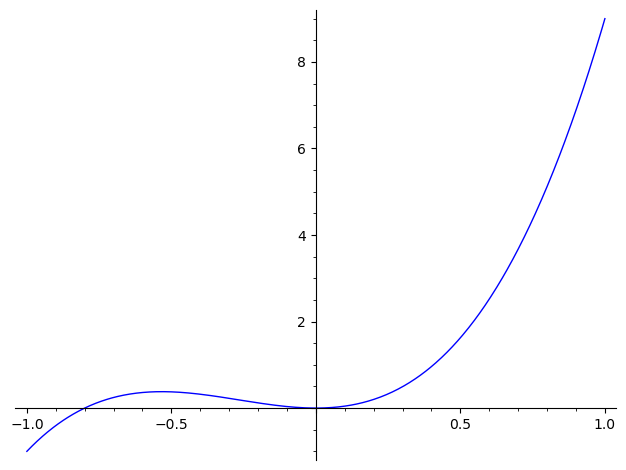

In [50]:
plot(w)